# [TextRank](https://github.com/summanlp/textrank)
TextRank - это алгоритм, основанный на PageRank, который часто используется для извлечения ключевых слов и суммирования текста. В этой статье я помогу вам понять, как TextRank работает с примером извлечения ключевых слов, и покажу реализацию, выполненную Python.

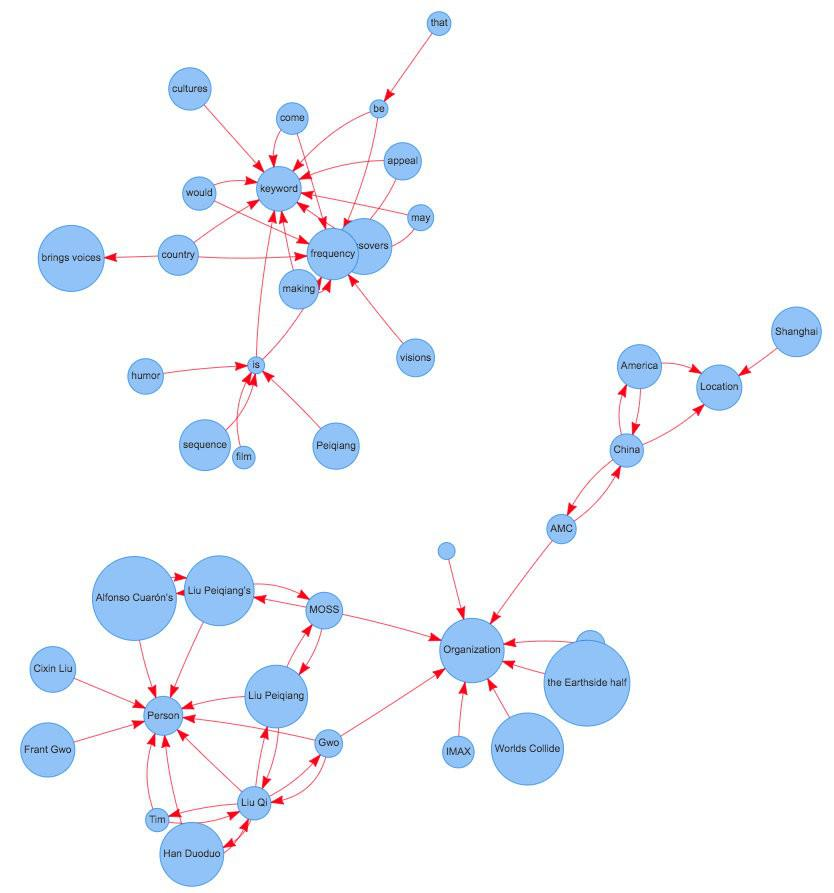

TextRank определяет отношение сходства между двумя предложениями на основе на основе общего содержания. Это совпадение рассчитывается просто как количество общих lexical tokens между ними, деленное на длину каждого из них, чтобы избежать продвижения длинных предложений.

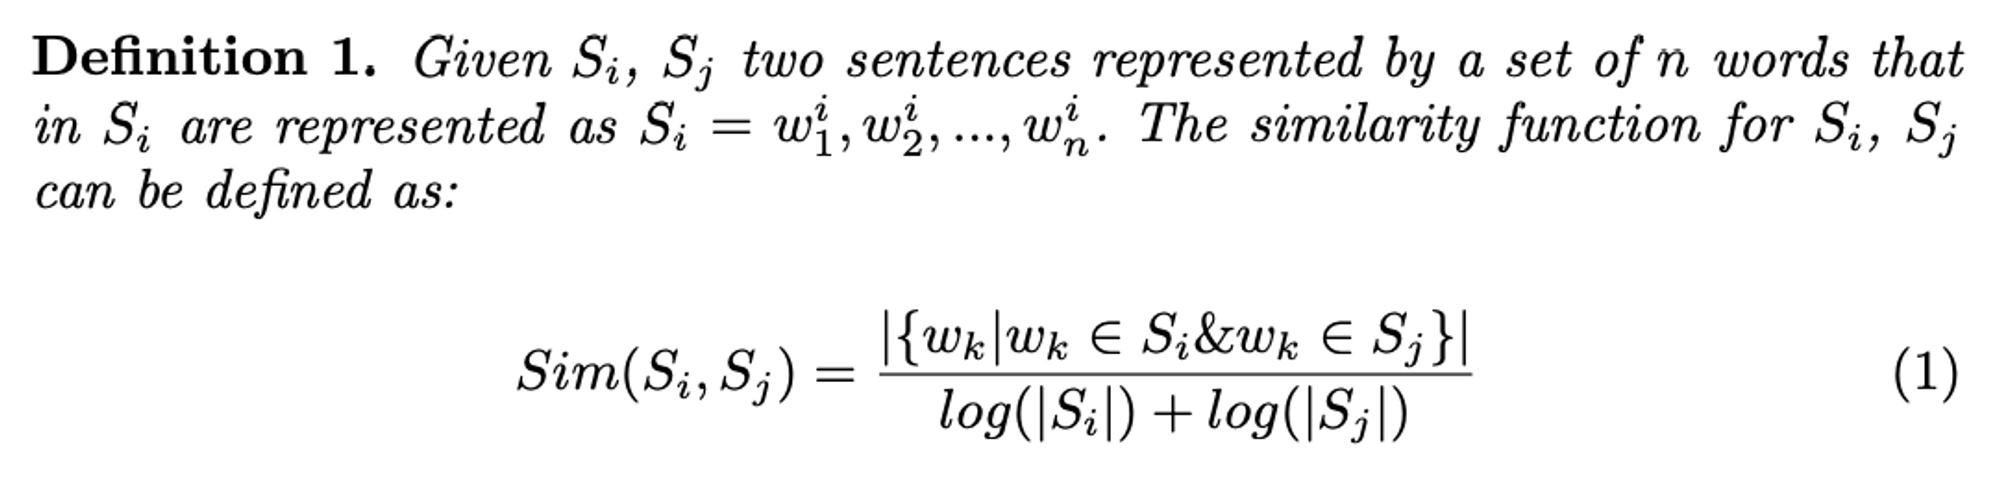

В данной работе представлены три различных варианта алгоритма TextRank для автоматического подведения итогов. Эти три варианта значительно улучшили результаты алгоритма, используя ту же тестовую конфигурацию, что и в оригинальной публикации.

Учитывая, что результат TextRank на 2,84% выше базового, наше улучшение на 2,92% над показателем TextRank является важным результатом. Сочетание TextRank с современными функциями ранжирования в информационном поиске такими функциями, как BM25 и BM25+, создает надежный метод для автоматического резюмирования, который работает лучше, чем стандартные методы, использовавшиеся ранее. На основании этих результатов мы предлагаем использовать BM25 вместе с TextRank для задачи автоматического резюмирования текстов без контроля. Полученные результаты и проанализированные примеры показывают, что эта вариация лучше, чем оригинальный TextRank без потери производительности.

In [3]:
%pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 567.5 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54390 sha256=95d8d8be149a5257ccec1dac2a08d3188cc73721d4914a41f2397f37ad681957
  Stored in directory: /Users/nikitav/Library/Caches/pip/wheels/55/a7/39/101e558b91aa3d5c02f3aca887a3abf9b3650005bbb99fbb95
Successfully built summa
Note: you may need to restart the kernel to use updated packages.


In [4]:
text = """Automatic summarization is the process of reducing a text document with a \
computer program in order to create a summary that retains the most important points \
of the original document. As the problem of information overload has grown, and as \
the quantity of data has increased, so has interest in automatic summarization. \
Technologies that can make a coherent summary take into account variables such as \
length, writing style and syntax. An example of the use of summarization technology \
is search engines such as Google. Document summarization is another."""

In [24]:
from summa import summarizer

# Command-line usage:
# textrank -t FILE

print(summarizer.summarize(text))

Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.


In [21]:
from summa import keywords
print(keywords.keywords(text))

document
automatic summarization
technologies
technology


In [51]:
from summa.summarizer import summarize

# Определите длину резюме как долю текста (также доступно в ключевых словах):
print(summarize(text, ratio=0.2))
print(10 * '---'+'\n')
print(summarize(text, ratio=0.4))
print(10 * '---'+'\n')

# Определите длину резюме по приблизительному количеству слов (также доступно в ключевых словах):
print(summarize(text, words=30))
print(10 * '---'+'\n')
print(summarize(text, words=50))
print(10 * '---'+'\n')

# Получение результатов в виде списка (также доступно в ключевых словах):
print(summarize(text, split=True))
print(10 * '---'+'\n')

Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.
------------------------------

Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.
Document summarization is another.
------------------------------

Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.
------------------------------

Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.
An example of the use of summarization technology is search engines such as Google.
Document summarization is another.
----------

In [43]:
# Определите язык входного текста (также доступно в ключевых словах).

# Доступные языки: arabic, danish, dutch, english, finnish, french, german, hungarian,
# italian, norwegian, polish, porter, portuguese, romanian, russian, spanish and swedish:
summarize(text, language='english')

'Automatic summarization is the process of reducing a text document with a computer program in order to create a summary that retains the most important points of the original document.'

In [54]:
from summa.keywords import keywords

# Определите длину резюме как долю текста (также доступно в ключевых словах):
print(keywords(text, ratio=0.2))
print(10 * '---'+'\n')
print(keywords(text, ratio=0.4))
print(10 * '---'+'\n')

# Определите длину резюме по приблизительному количеству слов (также доступно в ключевых словах):
print(keywords(text, words=5))
print(10 * '---'+'\n')
print(keywords(text, words=2))
print(10 * '---'+'\n')

# Получение результатов в виде списка (также доступно в ключевых словах):
print(keywords(text, split=True))
print(10 * '---'+'\n')

document
automatic summarization
technologies
technology
------------------------------

automatic summarization
text document
technologies
technology
original
google
writing
------------------------------

automatic summarization
text document
technologies
technology
------------------------------

summarization
document
------------------------------

['document', 'automatic summarization', 'technologies', 'technology']
------------------------------



# [PyTextRank](https://github.com/DerwenAI/pytextrank/)

In [59]:
%pip install pytextrank spacy
!python -m spacy download ru_core_news_sm

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 3.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [71]:
import spacy
import pytextrank
from icecream import ic

# example text
text = "Automatic summarization is the process of reducing a text document with a \
computer program in order to create a summary that retains the most important points \
of the original document. As the problem of information overload has grown, and as \
the quantity of data has increased, so has interest in automatic summarization. \
Technologies that can make a coherent summary take into account variables such as \
length, writing style and syntax. An example of the use of summarization technology \
is search engines such as Google. Document summarization is another."

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(text)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases:
    print(phrase.text)
    print(phrase.rank, phrase.count)
    print(phrase.chunks)

Document summarization
0.16750401781073998 1
[Document summarization]
Automatic summarization
0.12647463330242587 1
[Automatic summarization]
automatic summarization
0.12647463330242587 1
[automatic summarization]
summarization technology
0.11959155672451591 1
[summarization technology]
syntax
0.11263170297949593 1
[syntax]
order
0.10321077468111395 1
[order]
account variables
0.09630124997725534 1
[account variables]
style
0.08899636556104953 1
[style]
search engines
0.08896906833763862 1
[search engines]
the original document
0.08490649095077166 1
[the original document]
Google
0.08071079649280671 2
[Google, Google]
a text document
0.07947843436095939 1
[a text document]
length
0.07917259670135632 1
[length]
interest
0.06954896663786486 1
[interest]
a computer program
0.06761901262961391 1
[a computer program]
Technologies
0.0627503631993361 1
[Technologies]
data
0.060870430820617216 1
[data]
information overload
0.05920027864155113 1
[information overload]
a summary
0.04969476766084

In [73]:
for chunk in doc.noun_chunks:
    ic(chunk.text)

ic| chunk.text: 'Automatic summarization'
ic| chunk.text: 'the process'
ic| chunk.text: 'a text document'
ic| chunk.text: 'a computer program'
ic| chunk.text: 'order'
ic| chunk.text: 'a summary'
ic| chunk.text: 'that'
ic| chunk.text: 'the most important points'
ic| chunk.text: 'the original document'
ic| chunk.text: 'the problem'
ic| chunk.text: 'information overload'
ic| chunk.text: 'the quantity'
ic| chunk.text: 'data'
ic| chunk.text: 'interest'
ic| chunk.text: 'automatic summarization'
ic| chunk.text: 'Technologies'
ic| chunk.text: 'that'
ic| chunk.text: 'account variables'
ic| chunk.text: 'length'
ic| chunk.text: 'style'
ic| chunk.text: 'syntax'
ic| chunk.text: 'An example'
ic| chunk.text: 'the use'
ic| chunk.text: 'summarization technology'
ic| chunk.text: 'search engines'
ic| chunk.text: 'Google'
ic| chunk.text: 'Document summarization'
ic| chunk.text: 'another'


Код в 30 строчки

http://igorshevchenko.ru/blog/entries/textrank

In [76]:
text_rr = """Обязанности:



  Ручная вязка колбасных изделий, сосисок, сарделек.
  Формовка колбасных изделий
Соблюдение требований к выпускаемому продукту
 

Требования:

Опыт работы
 Готовы рассмотреть без опыта работы, но с желанием учиться данной профессии
Аккуратность
Исполнительность 
Условия:

Обучение профессии с нуля
Льготное питание 
Своевременная заработная плата"""
print(summarize(text_rr, words=25))
print(10 * '---'+'\n')

Ручная вязка колбасных изделий, сосисок, сарделек.
Формовка колбасных изделий
Опыт работы
Готовы рассмотреть без опыта работы, но с желанием учиться данной профессии
Обучение профессии с нуля
------------------------------



In [81]:
text_rr = """Наша компания является мультипродуктовой, это значит, что у наших менеджеров всегда есть на выбор большой спектр услуг для продаж
За 23 года нашей работы мы стали лучшей логистической компанией для людей
Многие сотрудники также быстро растут по карьерной лестнице, как и обороты компании, поэтому сейчас мы открываем подбор специалистов в отдел продаж
Что предстоит делать?
Управление продажами: постановка задач и целей менеджерам по продажам, контроль работы менеджеров - выполнения показателей и нормативов. Анализ воронки продаж.
Работа с персоналом: участие в подборе персонала, наставничество у новых менеджеров, обучение менеджеров по продажам, проведение митингов, визуализация работы отдела, в подчинении - менеджеры активных продаж, менеджеры по развитию базы, менеджеры по ключевым клиентам.
Продажи: поиск новых ключевых клиентов, встречи со сложными крупными клиентами и партнерами.
Требования:
Опыт управления от 1-3 лет (не только с людьми, но и с процессами)
Опыт достижения результата в kpi.Опыт формирования команды
Знание основ и показателей продаж. Высокие коммуникативные навыки (для проведения встреч с первыми лицами крупных компаний и выступления на конференциях)
Условия:
Своевременная заработная плата (оклад+ %+бонус)
График работы: пн-пт 9:00 -18:00; сб, вскр.-всегда выходные
Оформление по ТК РФ с первого дня работы, оплачиваемые больничные и отпускные
Обучение на базе Корпоративного университета
Если тебя привлекает возможность высокого дохода и заряжает управление командой - откликайся!
Если желаешь быстрее попасть в федеральную логистическую компанию, звони)
Адрес
удаленно из дома"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')

Работа с персоналом: участие в подборе персонала, наставничество у новых менеджеров, обучение менеджеров по продажам, проведение митингов, визуализация работы отдела, в подчинении - менеджеры активных продаж, менеджеры по развитию базы, менеджеры по ключевым клиентам.
------------------------------



In [82]:
text_rr = """Требования: 

- Опыт работы в общественном питании.(рассмотрим с минимальным опытом от 3 мес) 

- Ответственность, умение работать в режиме многозадачности 

Обязанности: 

Управление товарным ассортиментом торгового зала,
Порядок ценообразования,подготовка к началу рабочего дня,
Выполнение поручения управляющего (заявки на пропуска
Условия: 

- График работы 5/2 с 08.00 до 17.00 на территории работадателя (м. Ломоносовская/Дыбенко, Октябрьская наб 108 к2 лит ВХ) 

- Оформление по ТК РФ , (отпуск, больничный)

- Ежемесячные премии, зарплата без задержек 

- Питание за счет компании;"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')

- Опыт работы в общественном питании.(рассмотрим с минимальным опытом от 3 мес) 
- График работы 5/2 с 08.00 до 17.00 на территории работадателя (м.
------------------------------



In [86]:

text_rr = """Компания ООО «СМК Инженерные системы» - производитель российских анкерных линий и устройств для работы на высоте, выпускаемых под брендом «Линия Жизни» в поиске Инженера проектировщика. Рассмотрим кандидатов без опыта работы с высокой степенью мотивации и профильными знаниями (ПГС)!

Мы работаем с такими крупными компаниями, как Газпром, НЛМК, Интер РАО, Северсталь.

В состав команды входит:

- Проектно-конструкторский отдел. Разработка и внедрение в производство новых продуктов. Разработка комплектов проектно-сметной документации для оснащения объектов системами безопасности при работе на высоте

- Производственный отдел. Изготовление и сборка элементов анкерных линий и устройств для работы на высоте

- Строительно-монтажный отдел. Монтаж металлоконструкций и установка систем безопасности при работе на высоте, проведение обучения на объектах правилами пользования анкерными устройствами

- Испытательная лаборатория. Проведение испытаний на требуемые нагрузки готовой продукции и новых видов анкерных устройств

Что предлагаем:

-Работа в офисе в г. Санкт-Петербург, ул. Новосёлов, 49

-График 5/2(сб, вс-выходные) с 9 до 18ч

-Оплата: оклад 70000 рублей (на испытательный срок в течение 3 мес. - 60 000 рублей)

-Командировки по России примерно 1 раз в месяц (Посещение технически сложных производств и строительных объектов)

-Официальное оформление, согласно ТК РФ

- Наставничество и обучение с первого дня работы

-Работу с простыми, небольшими, но уникальные проектами для промышленных предприятий

Что предстоит делать:

-Проектно разрабатывать рабочую документации по АС, КМ и КМД

-По необходимости для сбора информации по проекту ездить в командировки на объекты по России

Требования к кандидату:

-Инженер проектировщик со знанием требований строительных норм

-Опыт работы в AutoCad обязателен

-Желателен опыт работы с разработкой рабочей и/или технической документации марок АС и КМ, КМД для рабочей документации, но не обязательно, в компании предусмотрено наставничество под руководством руководителя отдела (главного проектировщика) в течение первого года работы

-Опыт расчетов в SCAD или ПК Лира

-Высшее профильное образование (ПГС)

-Опыт работы от года

-знание SolidWorks, Revit-желательно"""
print(summarize(text_rr, ratio=0.1))
print(10 * '---'+'\n')


Компания ООО «СМК Инженерные системы» - производитель российских анкерных линий и устройств для работы на высоте, выпускаемых под брендом «Линия Жизни» в поиске Инженера проектировщика.
Изготовление и сборка элементов анкерных линий и устройств для работы на высоте
-Желателен опыт работы с разработкой рабочей и/или технической документации марок АС и КМ, КМД для рабочей документации, но не обязательно, в компании предусмотрено наставничество под руководством руководителя отдела (главного проектировщика) в течение первого года работы
------------------------------



In [83]:

text_rr = """Компания ООО «СМК Инженерные системы» - производитель российских анкерных линий и устройств для работы на высоте, выпускаемых под брендом «Линия Жизни» в поиске Инженера проектировщика. Рассмотрим кандидатов без опыта работы с высокой степенью мотивации и профильными знаниями (ПГС)!

Мы работаем с такими крупными компаниями, как Газпром, НЛМК, Интер РАО, Северсталь.

В состав команды входит:

- Проектно-конструкторский отдел. Разработка и внедрение в производство новых продуктов. Разработка комплектов проектно-сметной документации для оснащения объектов системами безопасности при работе на высоте

- Производственный отдел. Изготовление и сборка элементов анкерных линий и устройств для работы на высоте

- Строительно-монтажный отдел. Монтаж металлоконструкций и установка систем безопасности при работе на высоте, проведение обучения на объектах правилами пользования анкерными устройствами

- Испытательная лаборатория. Проведение испытаний на требуемые нагрузки готовой продукции и новых видов анкерных устройств

Что предлагаем:

-Работа в офисе в г. Санкт-Петербург, ул. Новосёлов, 49

-График 5/2(сб, вс-выходные) с 9 до 18ч

-Оплата: оклад 70000 рублей (на испытательный срок в течение 3 мес. - 60 000 рублей)

-Командировки по России примерно 1 раз в месяц (Посещение технически сложных производств и строительных объектов)

-Официальное оформление, согласно ТК РФ

- Наставничество и обучение с первого дня работы

-Работу с простыми, небольшими, но уникальные проектами для промышленных предприятий

Что предстоит делать:

-Проектно разрабатывать рабочую документации по АС, КМ и КМД

-По необходимости для сбора информации по проекту ездить в командировки на объекты по России

Требования к кандидату:

-Инженер проектировщик со знанием требований строительных норм

-Опыт работы в AutoCad обязателен

-Желателен опыт работы с разработкой рабочей и/или технической документации марок АС и КМ, КМД для рабочей документации, но не обязательно, в компании предусмотрено наставничество под руководством руководителя отдела (главного проектировщика) в течение первого года работы

-Опыт расчетов в SCAD или ПК Лира

-Высшее профильное образование (ПГС)

-Опыт работы от года

-знание SolidWorks, Revit-желательно"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


-Желателен опыт работы с разработкой рабочей и/или технической документации марок АС и КМ, КМД для рабочей документации, но не обязательно, в компании предусмотрено наставничество под руководством руководителя отдела (главного проектировщика) в течение первого года работы
------------------------------



In [84]:

text_rr = """Компания ООО «СМК Инженерные системы» - производитель российских анкерных линий и устройств для работы на высоте, выпускаемых под брендом «Линия Жизни» в поиске Инженера проектировщика. Рассмотрим кандидатов без опыта работы с высокой степенью мотивации и профильными знаниями (ПГС)!

Мы работаем с такими крупными компаниями, как Газпром, НЛМК, Интер РАО, Северсталь.

В состав команды входит:

- Проектно-конструкторский отдел. Разработка и внедрение в производство новых продуктов. Разработка комплектов проектно-сметной документации для оснащения объектов системами безопасности при работе на высоте

- Производственный отдел. Изготовление и сборка элементов анкерных линий и устройств для работы на высоте

- Строительно-монтажный отдел. Монтаж металлоконструкций и установка систем безопасности при работе на высоте, проведение обучения на объектах правилами пользования анкерными устройствами

- Испытательная лаборатория. Проведение испытаний на требуемые нагрузки готовой продукции и новых видов анкерных устройств

Что предлагаем:

-Работа в офисе в г. Санкт-Петербург, ул. Новосёлов, 49

-График 5/2(сб, вс-выходные) с 9 до 18ч

-Оплата: оклад 70000 рублей (на испытательный срок в течение 3 мес. - 60 000 рублей)

-Командировки по России примерно 1 раз в месяц (Посещение технически сложных производств и строительных объектов)

-Официальное оформление, согласно ТК РФ

- Наставничество и обучение с первого дня работы

-Работу с простыми, небольшими, но уникальные проектами для промышленных предприятий

Что предстоит делать:

-Проектно разрабатывать рабочую документации по АС, КМ и КМД

-По необходимости для сбора информации по проекту ездить в командировки на объекты по России

Требования к кандидату:

-Инженер проектировщик со знанием требований строительных норм

-Опыт работы в AutoCad обязателен

-Желателен опыт работы с разработкой рабочей и/или технической документации марок АС и КМ, КМД для рабочей документации, но не обязательно, в компании предусмотрено наставничество под руководством руководителя отдела (главного проектировщика) в течение первого года работы

-Опыт расчетов в SCAD или ПК Лира

-Высшее профильное образование (ПГС)

-Опыт работы от года

-знание SolidWorks, Revit-желательно"""
print(keywords(text_rr, words=20))
print(10 * '---'+'\n')


в
и
с
для работы на
по
документации
проектно
отдел
анкерных
опыт
высоте
под
проектировщика
пгс
объектов
наставничество
проведение
что
------------------------------



In [87]:

text_rr = """Вакансия компании: Центр функциональной ортодонтии и протезирования

Обязанности:

Встреча пациента и приглашение в кабинет.
Подготовка рабочего места к приему пациента.
Уборка рабочего места после приема пациента.
Ведение документации.
Содержание помещения кабинета, инвентаря и оборудования в должном порядке.
Контроль сохранности материалов, оборудования и инструментов, находящихся в рабочем кабинете.
Соблюдение и исполнение санитарно-гигиенического и противоэпидемического режима в рабочем кабинете и в клинике.
Осуществление текущей и генеральной уборки своего кабинета.
Работа с доктором в четыре руки.
Требования:

Позитивное отношение к людям.
Соблюдение правил дезинфекции и стерилизации инструментария.
Диплом об окончании среднего специального медицинского учреждения.
Сертификат Сестринское дело или Сестринское дело в стоматологии
Действующая медицинская книжка.
Опыт работы приветствуется.
Пунктуальность во всем.
Порядочное отношение к работодателю и имуществу клиники.
Адрес
г Санкт-Петербург, проспект Римского-Корсакова, д 29"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


Встреча пациента и приглашение в кабинет.
Контроль сохранности материалов, оборудования и инструментов, находящихся в рабочем кабинете.
------------------------------



In [88]:

text_rr = """ОО "Газпром газомоторное топливо" - единый оператор по развитию рынка газомоторного топлива Российской Федерации в связи с активным расширением сети автомобильных газонаполнительных компрессорных станций (АГНКС) открывает вакансию Оператор технологических установок.
 
Обязанности:
- обслуживание криогенного и вспомогательного оборудования на АГНКС;
- работа с оборудованием под давлением;
- заправка транспорта СПГ;
- слив СПГ;
- поддержание порядка на территории заправочной станции;
- кассовое обслуживание (на период отсутствия наполнителя баллонов).
Требования:
- образование техническое (не ниже начального профессионального);
- обязателен опыт работы в обслуживании технологического оборудования, опыт работы с газовым оборудованием приветствуется.
 
Мы предлагаем:
Работу в стабильной перспективной компании
Своевременные выплаты заработной платы + премии
Обучение за счёт компании, освоение новой профессии за счет работодателя.
Трудоустройство в соответствии с ТК РФ, расширенный социальный пакет, ДМС
Работу по сменному графику (с дневными и ночными сменами)"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


- обязателен опыт работы в обслуживании технологического оборудования, опыт работы с газовым оборудованием приветствуется.
------------------------------



In [89]:

text_rr = """Требования:
по ремонту и обслуживанию систем вентиляции и кондиционирования 5 разряда. График работы 5-дневка, пн-чт с 8.00 до 17.00, пт с 8.00 до 15.20. Белая з/п. Оформление по ТК РФ. Проход на территорию завода по предварительной записи. З/п от 66 т.р. м. Рыбацкое, пос. Понтонный, ул. Заводская, д. 10
Информация о работодателе: Средне-Невский судостроительный завод."""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


Белая з/п.
Оформление по ТК РФ.
Проход на территорию завода по предварительной записи.
З/п от 66 т.р.
------------------------------



In [90]:

text_rr = """Обязанности: 
Изготовление ключей , замена батареек , печать документов ,
 
Требования: 
Умение вести диалог, упорство , настойчивость , обучаемость , умение работать в команде , желание заработать ,
 
Условия: 
График работы по договоренности 5\2 или 2/2
режим работы с 10 оо до 21 оо обед с 14 30 до 15 оо сидячая работа"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


График работы по договоренности 5 или 2/2
режим работы с 10 оо до 21 оо обед с 14 30 до 15 оо сидячая работа
------------------------------



In [91]:

text_rr = """В клининговую компанию приглашаем на работу дворником!



УСЛОВИЯ: 

График 6/1 с 08:00-18:00;
Стабильные выплаты заработной платы 2 раза в месяц;
Официальное оформление по ТК РФ;
Инвентарь и спец одежда предоставляется компанией.


ОБЯЗАННОСТИ:

Уборка территории жилого комплекса;
Поддержка чистоты;
Сбор и вынос мусора.


ТРЕБОВАНИЯ:

Трудолюбие;
Ответственность;
Активность."""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


В клининговую компанию приглашаем на работу дворником!
Стабильные выплаты заработной платы 2 раза в месяц;
Сбор и вынос мусора.
------------------------------



In [ ]:

text_rr = """"""
print(summarize(text_rr, words=20))
print(10 * '---'+'\n')


In [92]:
%pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 831.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 2.3 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 3.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=30ae603b2a05412ec94bd37cec772b5af0276276c5de2f83ac1faae2d8c1f4c1
  Stored in directory: /Users/nikitav/Library/Caches/pip/wheels/a3/54/93/5ee986869eff19018d2b18012d2020e3f11e03998814a89400
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=d16537a4c12296fbecc2c87229010a432b2

In [93]:
!sumy --help

Sumy - automatic text summarizer.

Usage:
    sumy (luhn | edmundson | lsa | text-rank | lex-rank | sum-basic | kl) [--length=<length>] [--language=<lang>] [--stopwords=<file_path>] [--format=<format>]
    sumy (luhn | edmundson | lsa | text-rank | lex-rank | sum-basic | kl) [--length=<length>] [--language=<lang>] [--stopwords=<file_path>] [--format=<format>] --url=<url>
    sumy (luhn | edmundson | lsa | text-rank | lex-rank | sum-basic | kl) [--length=<length>] [--language=<lang>] [--stopwords=<file_path>] [--format=<format>] --file=<file_path>
    sumy (luhn | edmundson | lsa | text-rank | lex-rank | sum-basic | kl) [--length=<length>] [--language=<lang>] [--stopwords=<file_path>] [--format=<format>] --text=<text>
    sumy --version
    sumy --help

Options:
    --length=<length>        Length of summarized text. It may be count of sentences
                             or percentage of input text. [default: 20%]
    --language=<lang>        Natural language of summarized text. [def

In [ ]:
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 4

parser = PlaintextParser.from_file("sampleText.txt", Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)

print("\n====== Luhn ======")
summarizerLuhn = LuhnSummarizer(stemmer)
summarizerLuhn.stop_words = get_stop_words(LANGUAGE)
for sentenceLuhn in summarizerLuhn(parser.document, SENTENCES_COUNT):
    print(sentenceLuhn, "\n")

print("====== TextRank ======")
summarizerTR = TextRankSummarizer(stemmer)
summarizerTR.stop_words = get_stop_words(LANGUAGE)
for sentenceTR in summarizerTR(parser.document, SENTENCES_COUNT):
    print(sentenceTR, "\n")

print("====== LSA ======")
summarizerLSA = LsaSummarizer(stemmer)
summarizerLSA.stop_words = get_stop_words(LANGUAGE)
for sentenceLSA in summarizerLSA(parser.document, SENTENCES_COUNT):
    print(sentenceLSA, "\n")

print("====== Edmonson ======")
summarizerEd = EdmundsonSummarizer(stemmer)
summarizerEd.bonus_words = ('focus', 'proposed', 'method', 'describes')
summarizerEd.stigma_words = ('example')
summarizerEd.null_words = ('literature', 'however')
for sentenceEd in summarizerEd(parser.document, SENTENCES_COUNT):